In [2]:
import numpy as np

import sklearn as sk
import math
import statistics
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd

#1
Machine learning is an incredibly useful and powerful tool. It is able to analyze patterns and predict the future(or at least the likelihood of certain things happening in the future) at times much more efficiently than humans can. But like all things, it has its downsides. 
One of the most common uses for machine learning is when trying to predict outcomes. Whether it be stock prices or data relating to customers and sales, machine learning typically excels in this department. I actually heard a good example of this last week when I went to a speech given by somebody in the  Churchill Downs who tries to maximize profit for their casinos. In this scenario, machine learning is able to take a bunch of data and analyze it within relation to each other and plenty of other variables to attempt to decide whether or not Churchill Downs would benefit from building a casino in a certain location(or anything else they wanted to know). Machine learning excels in datasets of larger magnitudes, especially since that can be where humans struggle. Another thing that uses machine learning(even if not necessarily as data based but still very apparent in today's world) is image recognition. While machine learning uses past examples and experiences rather than data to predict outcomes, there are still similarities between its purposes.
An obvious time to avoid using machine learning, is if you do not have the right equipment to do it. While ML is very powerful, it also requires quite a bit of just that, power. It is important to have at least somewhat advanced and up to date technology to use ML. The more advanced the data and outcomes we want become, the more and better resources we need. Just like how ML excels with large datasets, it tends to struggle a little bit with smaller datasets/isn't as useful anyway. Less data can lead to machine learning drawing overgeneralized, not particularly useful, or not totally accurate conclusions. While on the topic of inaccuracy, machine learning probably should not be used if we know beforehand that getting an error could be catastrophic. Obviously you never want to see an error but in some cases they are just a minor drawback. In other cases, peoples' lives might be on the line. In these cases, some sort of human judgement must be present.

In [3]:
titanic_df=pd.read_csv('titanic_test_data.csv')
titanic_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


#2
convert all the data to lowercase for simplicity and consistency reasons

In [4]:
titanic_df=titanic_df.map(lambda x: x.lower() if isinstance(x, str) else x)

one hot encoding:

In [5]:
one_hot_titanic_df=pd.get_dummies(titanic_df[['Sex', 'Cabin', 'Embarked']])

In [6]:
one_hot_titanic_df

,Sex_female,Sex_male,Cabin_a11,Cabin_a18,Cabin_a21,Cabin_a29,Cabin_a34,Cabin_a9,Cabin_b10,Cabin_b11,...,Cabin_f e46,Cabin_f e57,Cabin_f g63,Cabin_f2,Cabin_f33,Cabin_f4,Cabin_g6,Embarked_c,Embarked_q,Embarked_s
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
414,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
415,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
416,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


use np.where to create a new column to show the 'title' of each passenger

In [7]:
titanic_df["mr_mrs"] = np.where(titanic_df["Name"].str.contains("mrs."),"mrs",
                                np.where(titanic_df["Name"].str.contains("ms."),"ms","mr"))

similarly, use np.where to create a new column with the actual names of the locations passengers embarked from rather than just letters

In [8]:
titanic_df["embarked_new"]=np.where(titanic_df["Embarked"]=="c","cherbourg",
                                    np.where(titanic_df["Embarked"]=="q","queensland",
                                             "southampton"))

In [1]:
#3
cor_df=titanic_df.copy()
cor_df
cor_df['Name']=cor_df['Name'].astype('category').cat.codes
cor_df['Sex']=cor_df['Sex'].astype('category').cat.codes
cor_df['Cabin']=cor_df['Cabin'].astype('category').cat.codes
cor_df['Ticket']=cor_df['Ticket'].astype('category').cat.codes
cor_df['Embarked']=cor_df['Embarked'].astype('category').cat.codes
cor_df['mr_mrs']=cor_df['mr_mrs'].astype('category').cat.codes
cor_df['embarked_new']=cor_df['embarked_new'].astype('category').cat.codes
correlation=cor_df.corr()
correlation

NameError: name 'titanic_df' is not defined

In [ ]:
sns.heatmap(correlation, annot=True)
plt.show()

I go over 200 words here but as you read this it will be obvious why.

I was not sure on how to use feature selection which is why I got help from my friend Noah, a data science major on how to convert the columns with strings into columns with floats/ints, so I could actually make a correlation matrix at all, since that was how I thought of doing it in my head. I also did want to keep the original data which is why I made a copy of the original data set before I categorized the columns. 
Since there was no feature selection, there is a lot going on in the graph, making it hard to read, while also containing some fairly pointless columns, such as name or passenger id(although I was actually curious if passenger id would've had anything to do with where passengers were located which would obviously impact their escape route and therefore could affect their survival chances. From what I can see on the heatmap(and just the correlation matrix), it looks like fare, cabin, pclass, and age have some of the highest correlation to each other(outside of embarked and embarked_new which are literally the same inputs but with different names). Overall, many of the columns do seem fairly uncorrelated. 

In [ ]:
#4
boxplot = titanic_df.boxplot(column=['Fare'], return_type='axes')

In [ ]:
plt.show(boxplot)

looking at this boxplot, we see the average price looks to be around 15(I'm assuming dollars) while the 25th percentile is probably paying about 10 dollars while the 75th percentile looks to be paying about 30 dollars. There are definitely outliers, specifically on the more expensive end where we see many passengers in the 75-300 range and even one in over 500

In [13]:
#5
titanic_df['age_bin']=titanic_df['Age'].map(lambda x: '0-20' if x<21
                                              else '21-40' if x <41
                                              else '41-60' if x <61
                                              else '61-80' if x<81
                                              else '81+' if x>=81
                                              else 'na')

In [14]:
titanic_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,mr_mrs,embarked_new,age_bin
0,892,3,"kelly, mr. james",male,34.5,0,0,330911,7.8292,NaN,q,mr,queensland,21-40
1,893,3,"wilkes, mrs. james (ellen needs)",female,47.0,1,0,363272,7.0000,NaN,s,mrs,southampton,41-60
2,894,2,"myles, mr. thomas francis",male,62.0,0,0,240276,9.6875,NaN,q,mr,queensland,61-80
3,895,3,"wirz, mr. albert",male,27.0,0,0,315154,8.6625,NaN,s,mr,southampton,21-40
4,896,3,"hirvonen, mrs. alexander (helga e lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,s,mrs,southampton,21-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"spector, mr. woolf",male,NaN,0,0,a.5. 3236,8.0500,NaN,s,mr,southampton,na
414,1306,1,"oliva y ocana, dona. fermina",female,39.0,0,0,pc 17758,108.9000,c105,c,mr,cherbourg,21-40
415,1307,3,"saether, mr. simon sivertsen",male,38.5,0,0,soton/o.q. 3101262,7.2500,NaN,s,mr,southampton,21-40
416,1308,3,"ware, mr. frederick",male,NaN,0,0,359309,8.0500,NaN,s,mr,southampton,na


In [15]:
titanic_df['age_bin'].value_counts()

age_bin
21-40    187
na        86
0-20      69
41-60     66
61-80     10
Name: count, dtype: int64

looking at the new age_bin column created, we get to see a very not in depth breakdown of the ages of people on the titanic. unfortunately, about a fifth of the passengers in the data do not have their age in the data. However, we can still see patterns from the rest of the data. the most common age range was easily from 21 to 40. it also appears that nobody above the age of 80 was on the titanic and even people above the age of 60 were few and far between.

C:\Users\brady\AppData\Local\Temp\ipykernel_3624\3846063140.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for ax, (age_bin, group) in zip(axes.flatten(), titanic_df.groupby('age_bin')):


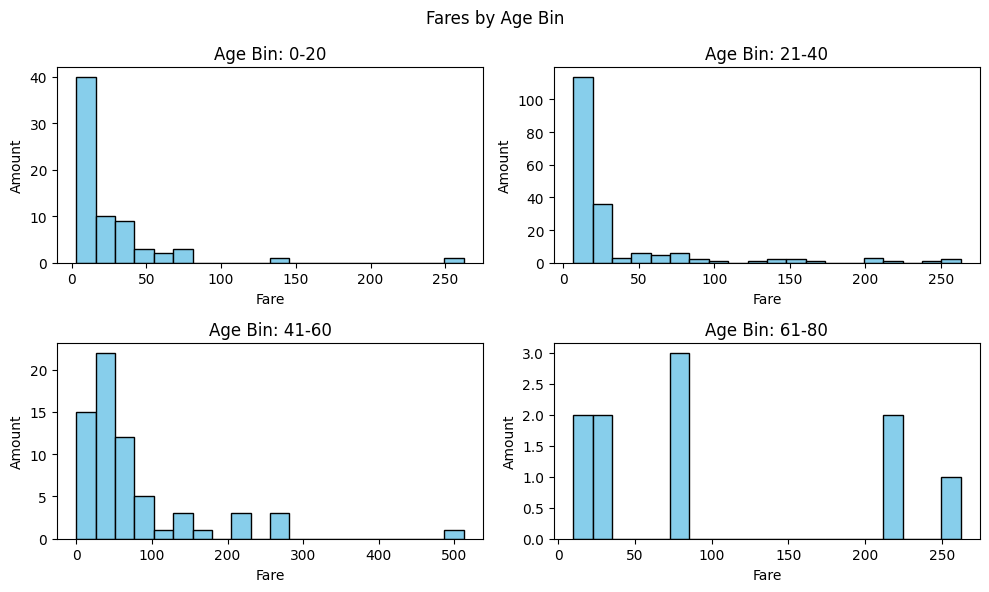

In [16]:
#6
bins = [0, 20, 40, 60, 80, float('inf')]
labels = ['0-20', '21-40', '41-60', '61-80', '81+']
titanic_df['age_bin'] = pd.cut(titanic_df['Age'], bins=bins, labels=labels)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
fig.suptitle('Fares by Age Bin')

for ax, (age_bin, group) in zip(axes.flatten(), titanic_df.groupby('age_bin')):
    ax.hist(group['Fare'], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Age Bin: {age_bin}')
    ax.set_xlabel('Fare')
    ax.set_ylabel('Amount')

plt.tight_layout()
plt.show()

Although it is a very small sample size, the oldest age group(61-80) has a much higher percentage of people getting the more expensive tickets. Similarly, the younger groups are almost all the very cheapest tickets with a few outliers. When we look at the 41-60 age group, we see the most spread out group. Not only is this were we see the highest percentage(aside from 61-80) in the 100+ or even 50+ range, this is also the only group(again excluding 61-80) where the mode is actually not the cheapest range. This makes as typically people tend to become wealthier as they get older, meaning they have more money to spend on the luxury tickets.

In [17]:
cor_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,mr_mrs,embarked_new
0,892,3,209,1,34.5,0,0,152,7.8292,-1,1,0,1
1,893,3,408,0,47.0,1,0,221,7.0000,-1,2,1,2
2,894,2,272,1,62.0,0,0,73,9.6875,-1,1,0,1
3,895,3,413,1,27.0,0,0,147,8.6625,-1,2,0,2
4,896,3,181,0,22.0,1,1,138,12.2875,-1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,356,1,NaN,0,0,267,8.0500,-1,2,0,2
414,1306,1,286,0,39.0,0,0,324,108.9000,22,0,0,0
415,1307,3,335,1,38.5,0,0,346,7.2500,-1,2,0,2
416,1308,3,389,1,NaN,0,0,220,8.0500,-1,2,0,2
